In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import *

import time

from src.camera import CameraIDS
from src.color_corrector import ColorCorrector
from src.auto_feature_manager import AutoFeatureManager

from src.timer import Timer
Timer.enabled = True

In [2]:
camera = CameraIDS()
camera.load_config("resources/cam_ids_config.cset")

In [3]:
auto_feature_manager = AutoFeatureManager(camera)
auto_feature_manager.auto_white_balance = 'on'
auto_feature_manager.auto_exposure = 'off'
auto_feature_manager.auto_gain= 'off'


In [4]:
color_corrector = ColorCorrector()

In [5]:
camera.start_acquisition()
camera.start_capturing()

Timings:
Post Processing                0.01056s
  Auto Features                0.00561s
  Color Correction             0.00490s
Timings:
Post Processing                0.00629s
  Auto Features                0.00004s
  Color Correction             0.00621s
Timings:
Post Processing                0.00710s
  Auto Features                0.00003s
  Color Correction             0.00705s
Timings:
Post Processing                0.00875s
  Auto Features                0.00281s
  Color Correction             0.00589s
Timings:
Post Processing                0.00513s
  Auto Features                0.00002s
  Color Correction             0.00508s


Text(0.5, 1.0, 'Corrected Image')

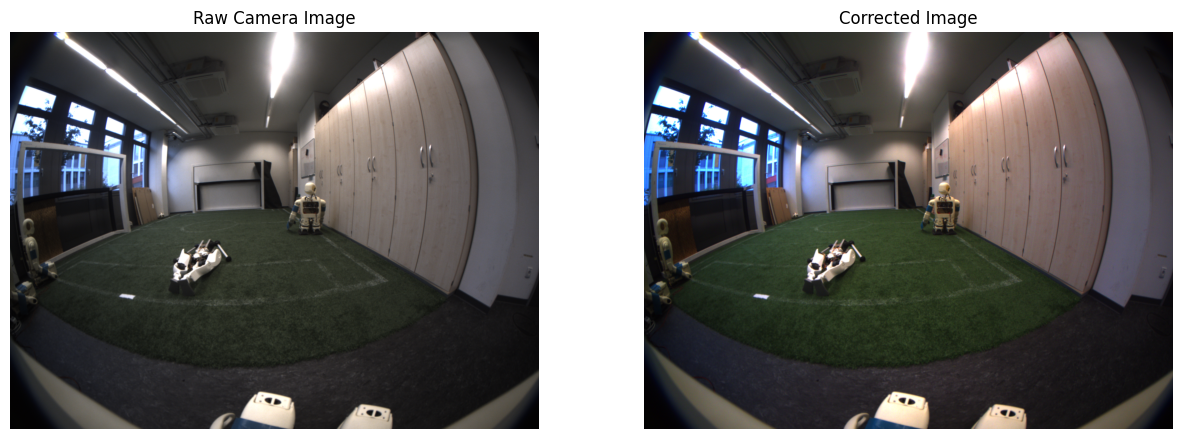

In [6]:
for i in range(5):
    img = camera.capture()
    img_before = np.copy(img.get_numpy_3D())
    with Timer("Post Processing"):
        with Timer("Auto Features"):
            auto_feature_manager(img)
        with Timer("Color Correction"):
            color_corrector(img)
    img_after = img.get_numpy_3D()
    time.sleep(0.01)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.axis('off')
ax.imshow(img_before)
ax.set_title("Raw Camera Image")
ax = fig.add_subplot(1, 2, 2)
ax.axis('off')
ax.imshow(img_after)
ax.set_title("Corrected Image")

In [7]:
camera.stop_acquisition()
camera.stop_capturing()

In [8]:
camera.close()

InternalErrorException: Error-Code: 1 (PEAK_RETURN_CODE_ERROR) | Error-Description: [Function: DSRevokeBuffer | Error-Code: -1022 (GC_ERR_BUSY) | Error-Text: Buffer is queued!